- visit this page to download pytorch first depending on system requirement : https://pytorch.org/
- visit pytorch documentation to find useful syntax : https://pytorch.org/docs/stable/

In [1]:
import torch 
from torch import nn

from sklearn.model_selection import train_test_split

In [2]:
from sklearn import datasets # to create makemoon dataset 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
X,y = datasets.make_moons(n_samples=1000,
                        noise=0.2,
                        random_state=42)

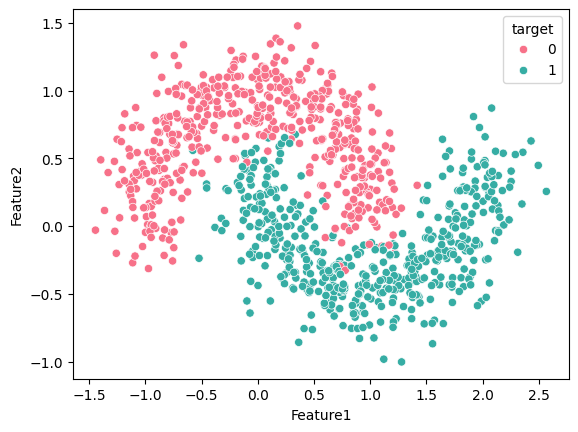

In [4]:
data_df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
data_df['target'] = y

# Visualize the data distribution
sns.scatterplot(x='Feature1', y='Feature2', hue='target', data=data_df, palette='husl')
plt.show()

In [5]:
data_df.head()

,Feature1,Feature2,target
0,-0.111667,0.520224,1
1,1.142650,-0.342577,1
2,0.795558,-0.011442,1
3,0.111827,-0.551932,1
4,-0.816466,0.543996,0


In [6]:
x = data_df.drop(columns='target')
y = data_df['target']

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=23,shuffle=True,stratify=y)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(800, 2) (800,) (200, 2) (200,)


In [8]:
x_train = torch.tensor(x_train.values, dtype=torch.float32)  
y_train = torch.tensor(y_train.values, dtype=torch.float32)  
x_test = torch.tensor(x_test.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)  

In [9]:
class ClassificationModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(2,requires_grad=True,dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
        self.sigmoid = nn.Sigmoid()

    def forward(self,x):
        z = torch.matmul(self.weights,x) + self.bias
        return self.sigmoid(z)

In [10]:
model = ClassificationModel()
model.state_dict()

OrderedDict([('weights', tensor([-1.0287, -1.0415])),
             ('bias', tensor([0.5938]))])

In [11]:
# Create the loss function
loss_fn = nn.BCELoss() # Binary Cross Entropy for Binary Classification Data 

# Create the optimizer
optimizer = torch.optim.SGD(params=model.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

In [12]:
temp = model(torch.transpose(x_train,0,1))
temp[:20] # sample predictions 

tensor([0.6369, 0.3885, 0.5520, 0.6735, 0.6492, 0.1036, 0.7258, 0.1810, 0.2615,
        0.6005, 0.6508, 0.5216, 0.0900, 0.6192, 0.5324, 0.6309, 0.5489, 0.6920,
        0.1702, 0.5808], grad_fn=<SliceBackward0>)

In [13]:
loss_fn(y_train,temp) # sample testing to see if it works 

tensor(52.2677, grad_fn=<BinaryCrossEntropyBackward0>)

In [14]:
torch.manual_seed(42)

epochs = 10000

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []


for epoch in range(epochs):

    # Put model in training mode (this is the default state of a model)
    model.train() 

    # 1. Forward pass on train data using the forward() method inside 
    y_pred = model(torch.transpose(x_train,0,1))

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

  ### Testing

    # Put the model in evaluation mode
    model.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model(torch.transpose(x_test,0,1))

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 1000 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")


Epoch: 0 | MAE Train Loss: 0.8491309881210327 | MAE Test Loss: 0.7912488579750061 
Epoch: 1000 | MAE Train Loss: 0.3615686893463135 | MAE Test Loss: 0.3710646331310272 
Epoch: 2000 | MAE Train Loss: 0.3201558589935303 | MAE Test Loss: 0.3340233564376831 
Epoch: 3000 | MAE Train Loss: 0.30672645568847656 | MAE Test Loss: 0.32132840156555176 
Epoch: 4000 | MAE Train Loss: 0.2998119294643402 | MAE Test Loss: 0.31470757722854614 
Epoch: 5000 | MAE Train Loss: 0.29544228315353394 | MAE Test Loss: 0.3105616867542267 
Epoch: 6000 | MAE Train Loss: 0.29240408539772034 | MAE Test Loss: 0.30773571133613586 
Epoch: 7000 | MAE Train Loss: 0.29018670320510864 | MAE Test Loss: 0.3057269752025604 
Epoch: 8000 | MAE Train Loss: 0.28852275013923645 | MAE Test Loss: 0.3042667508125305 
Epoch: 9000 | MAE Train Loss: 0.28725123405456543 | MAE Test Loss: 0.30319157242774963 


In [15]:
y_pred = model(torch.transpose(x_train,0,1))
y_pred_val = []

for i in y_pred:
    if i > 0.5:
        y_pred_val.append(1)
    else:
        y_pred_val.append(0)

y_pred_val = np.transpose(y_pred_val)

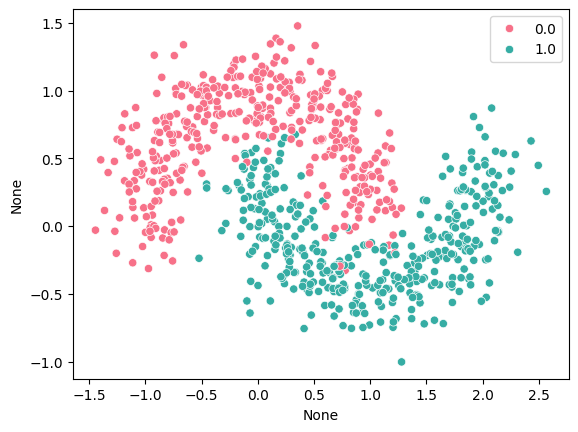

In [16]:
sns.scatterplot(x=x_train[:,0], y=x_train[:,1], hue=y_train.detach().numpy(), palette='husl')
plt.show()

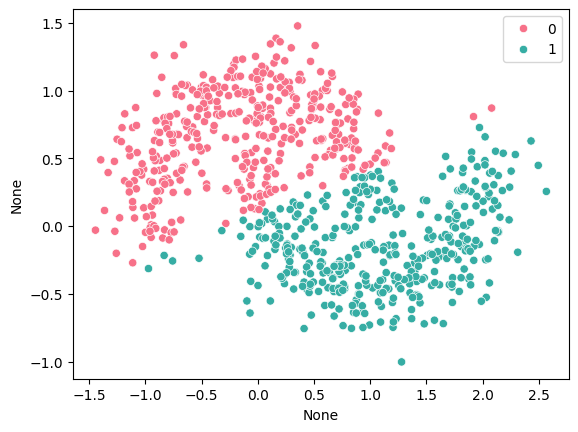

In [17]:
sns.scatterplot(x=x_train[:,0], y=x_train[:,1], hue=y_pred_val, palette='husl')
plt.show()